In [1]:
import BlackScholes as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import risk_free_rates as rf
import implied_q as iq
import time
import Quintic

from matplotlib import cm

In [2]:
# Read the dataset

S0 = 4017.8

IV_df = pd.read_csv("hist_spx.csv")
moneyness = np.array([80.0,90.0,95.0,97.5,100.0,102.5,105.0,110.0,120.0])
maturities = np.array(IV_df['Exp Date']).flatten()
IV = np.array(IV_df.drop(columns = 'Exp Date'))/100.

maturities = maturities[1:11]
IV = IV[1:11,:]

a = pd.read_csv("quintic_parameters.csv")

K = S0 * moneyness / 100

#rho,H,eps = (-0.834076610545994, 0.09915110585914862, 0.0368172049763494)      
#a_k = np.array([a.a0, a.a1, a.a3, a.a5]).flatten()

rho,H,eps = (-0.963529048591099, 0.026427625768152135, 0.03327797663980596)
a_k = np.array([1.2236844973767875, 0.45027430292716225, 0.036060072348015164, 0.05319950954795843])

In [3]:
nr = len(maturities); nc = len(K)
N = 12500; n = 1000;
T = maturities[-1]; steps = np.ceil(n*maturities/T).astype(int);
w = np.concatenate((np.zeros([1,N*2]), Quintic.dW(n, N)))

In [4]:
np.random.seed(0)
iv = np.zeros([nr,nc])

P = Quintic.global_reduction(rho, H, eps, T, a_k, S0, K, n, N, w, steps, maturities)
    
for i in range(nr):
    T_aux = maturities[i]
    r = rf.r(T_aux); q = iq.q(T_aux);
    iv[i,:] = bs.BSImpliedVol(S0, K, T_aux, r, q, P[i], Option_type = 1, toll = 1e-5)

In [5]:
print(f"Relative mean error on IV: {np.mean(abs(IV-iv)/IV)*100:.4f}%")

Relative mean error on IV: 3.7385%


In [8]:
print(f"Relative mean error on IV: {np.mean(abs(IV-iv)/IV)*100:.4f}%")

Relative mean error on IV: 2.9268%


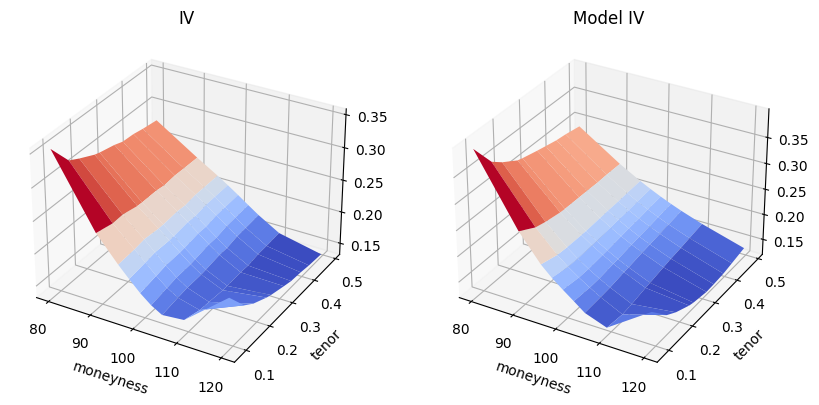

In [6]:
#%matplotlib notebook

mesh_x, mesh_y = np.meshgrid(moneyness,maturities)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
ax1 = fig.add_subplot(121,projection='3d')
surf1 = ax1.plot_surface(mesh_x, mesh_y, IV, cmap=cm.coolwarm, antialiased=True)
ax1.set_xlabel('moneyness')
ax1.set_ylabel('tenor')
ax1.set_title('IV')

ax2 = fig.add_subplot(122,projection='3d')
surf2 = ax2.plot_surface(mesh_x, mesh_y, iv, cmap=cm.coolwarm, antialiased=True)
ax2.set_xlabel('moneyness')
ax2.set_ylabel('tenor')
ax2.set_title('Model IV')

plt.show()